# Table of Contents
 <p><div class="lev1"><a href="#Function-definitions"><span class="toc-item-num">1&nbsp;&nbsp;</span>Function definitions</a></div><div class="lev1"><a href="#Increase-in-extreme-rainfall"><span class="toc-item-num">2&nbsp;&nbsp;</span>Increase in extreme rainfall</a></div><div class="lev2"><a href="#Total-GCM-scale-P"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Total GCM-scale P</a></div><div class="lev3"><a href="#1D-statistics"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>1D statistics</a></div><div class="lev3"><a href="#2D-joint-statistics"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>2D joint statistics</a></div><div class="lev1"><a href="#Implement-scaling"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implement scaling</a></div><div class="lev2"><a href="#piControl-run,-GCM-scale"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>piControl run, GCM scale</a></div><div class="lev3"><a href="#Extract-all-variables"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Extract all variables</a></div><div class="lev3"><a href="#Manually-compute-all-means-and-mean-profiles"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Manually compute all means and mean profiles</a></div><div class="lev3"><a href="#Manually-compute-means-at-extreme-P-quantile"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Manually compute means at extreme P quantile</a></div><div class="lev3"><a href="#Explore-Jake's-code-for-moist-adiabats"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Explore Jake's code for moist-adiabats</a></div><div class="lev3"><a href="#Get-the-vertical-pressure-coordinate-and-plot-the-above-means"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Get the vertical pressure coordinate and plot the above means</a></div><div class="lev3"><a href="#Combine-all-to-implement-scaling"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Combine all to implement scaling</a></div><div class="lev1"><a href="#Over-tropical-oceans-only"><span class="toc-item-num">4&nbsp;&nbsp;</span>Over tropical oceans only</a></div><div class="lev1"><a href="#CRM-plots-over-GCM-indices-of-most-intense-rainfall"><span class="toc-item-num">5&nbsp;&nbsp;</span>CRM plots over GCM indices of most intense rainfall</a></div><div class="lev2"><a href="#Compute-indices-of-extremes-for-a-given-P-variable-and-quantile-threshold"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Compute indices of extremes for a given P variable and quantile threshold</a></div>

In [640]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
from math import *
import glob
import string
from datetime import date, time, datetime
from pprint import pprint
import sys,os

plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'figure.titlesize': 'xx-large',
                     'figure.subplot.top': '0.87',
                     'figure.subplot.wspace': '0.5',
                     'figure.subplot.hspace': '0.3'})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Function definitions

In [654]:
# Add ../functions to system path
currentpath = %pwd
currentpath = str(currentpath)
##-- In a python script do the following instead:
##-- currentpath = os.path.dirname(os.path.realpath(__file__))
sys.path.insert(0,currentpath[:currentpath.rfind('/')+1]+'functions')
 

from importingData import *
from statistics import *
from extremeScaling import *
from thermodynamics import *
from thermo_funcs import *
from thermo_constants import *


# Increase in extreme rainfall

## Total GCM-scale P

Compare GCM-scale P, GCM-scale P_max

In [ ]:
###--- Import precipitation data ---###

inputdirroot = '/Users/bfildier/Data/preprocessed/' 
compset_spcam = 'FSPCAMm_AMIP'
compset_cam5 = 'FAMIPC5'
exp_PI = 'piControl'
exp_4xCO2 = 'abrupt4xCO2'
case_spcam_PI = 'bf_%s_%s'%(compset_spcam,exp_PI)
case_spcam_4xCO2 = 'bf_%s_%s'%(compset_spcam,exp_4xCO2)
inputdir_PI = os.path.join(inputdirroot,case_spcam_PI,'day')
inputdir_4xCO2 = os.path.join(inputdirroot,case_spcam_4xCO2,'day')
prect_id = 'PRECT'
precc_id = 'PRECC'

prect_PI = getVar(prect_id,inputdir_PI)*86400*1000    # Convert to mm/day
precc_PI = getVar(precc_id,inputdir_PI)*86400*1000    # Convert to mm/day
prect_4xCO2 = getVar(prect_id,inputdir_4xCO2)*86400*1000    # Convert to mm/day
precc_4xCO2 = getVar(precc_id,inputdir_4xCO2)*86400*1000    # Convert to mm/day

### 1D statistics

/Users/bfildier/Data/preprocessed/bf_FSPCAMm_AMIP_piControl/day
Sample size : 4608
Sample size : 4608
Sample size : 4608
Sample size : 4608
$\Delta T = $ 4.36096


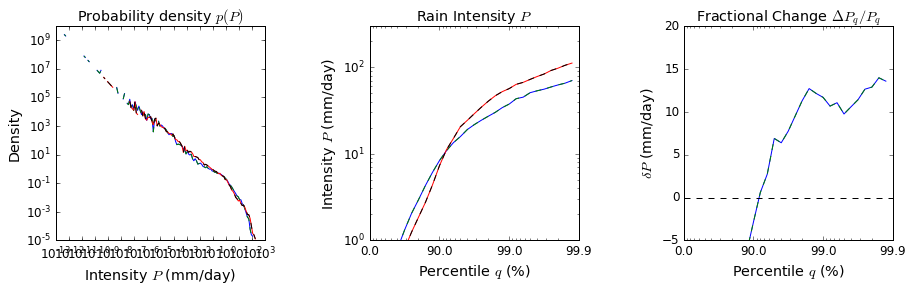

In [376]:
###--- 1D statistics ---###

# piControl run

maxQ, Q_IL, prect_PI_c_IL, prect_PI_e_IL, prect_PI_c_L, prect_PI_e_L, prect_PI_Hd_L =\
    getStatistics(prect_PI)
maxQ, Q_IL, precc_PI_c_IL, precc_PI_e_IL, precc_PI_c_L, precc_PI_e_L, precc_PI_Hd_L =\
    getStatistics(precc_PI)
maxQ, Q_IL, prect_4xCO2_c_IL, prect_4xCO2_e_IL, prect_4xCO2_c_L, prect_4xCO2_e_L, prect_4xCO2_Hd_L =\
    getStatistics(prect_4xCO2)
maxQ, Q_IL, precc_4xCO2_c_IL, precc_4xCO2_e_IL, precc_4xCO2_c_L, precc_4xCO2_e_L, precc_4xCO2_Hd_L =\
    getStatistics(precc_4xCO2)

pr_units = "mm/day"

## Compute change in temperature
subset=None
ts_PI = getVar('TS',inputdir_PI)
ts_PI_m = computeMean(ts_PI,subset=subset)
ts_4xCO2 = getVar('TS',inputdir_4xCO2)
ts_4xCO2_m = computeMean(ts_4xCO2,subset=subset)
dts = ts_4xCO2_m-ts_PI_m
print r"$\Delta T = $", dts

## Plot PDF and extremes
prect_PI_col = 'b'
precc_PI_col = 'g--'
prect_4xCO2_col = 'r'
precc_4xCO2_col = 'k--'

fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(prect_PI_c_L,prect_PI_Hd_L,prect_PI_col)
ax1.plot(prect_PI_c_L,precc_PI_Hd_L,precc_PI_col)
ax1.plot(prect_4xCO2_c_L,prect_4xCO2_Hd_L,prect_4xCO2_col)
ax1.plot(prect_4xCO2_c_L,precc_4xCO2_Hd_L,precc_4xCO2_col)
ax1.set_title(r"Probability density $p(P)$")
ax1.set_xlabel(r"Intensity $P$ (%s)"%pr_units)
ax1.set_ylabel("Density")

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((1,3e2))
# Trick to plot inverse logarithmic scale
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
ax2.plot(x,prect_PI_c_IL,prect_PI_col)
ax2.plot(x,precc_PI_c_IL,precc_PI_col)
ax2.plot(x,prect_4xCO2_c_IL,prect_4xCO2_col)
ax2.plot(x,precc_4xCO2_c_IL,precc_4xCO2_col)
ax2.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax2.set_xticklabels(labels)
ax2.set_title(r"Rain Intensity $P$")
ax2.set_xlabel(r"Percentile $q$ (%)")
ax2.set_ylabel(r"Intensity $P$ (%s)"%pr_units)


frac_change_prect = 100.*(np.divide(prect_4xCO2_c_IL,prect_PI_c_IL)-np.ones(x.shape))/dts
frac_change_precc = 100.*(np.divide(precc_4xCO2_c_IL,precc_PI_c_IL)-np.ones(x.shape))/dts
ax3.set_xscale('log')
ax3.set_ylim((-5,20))
# ax3.set_yscale('log')
# Trick to plot inverse logarithmic scale
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
# ax3.plot(x,np.ones(x.shape)-np.divide(prect_PI_c_IL,prect_4xCO2_c_IL),prect_PI_col)
ax3.plot(x,frac_change_prect,prect_PI_col)
# ax3.plot(x,np.ones(x.shape)-np.divide(precc_PI_c_IL,precc_4xCO2_c_IL),precc_PI_col)
ax3.plot(x,frac_change_precc,precc_PI_col)
ax3.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax3.set_xticklabels(labels)
ax3.axhline(y=0,linestyle='--',c='k')
ax3.set_title(r"Fractional Change $\Delta P_q/P_q$")
ax3.set_xlabel(r"Percentile $q$ (%)")
ax3.set_ylabel(r"$\delta P$ (%s)"%pr_units)

plt.show()

### 2D joint statistics

Sample size : 4608 4608


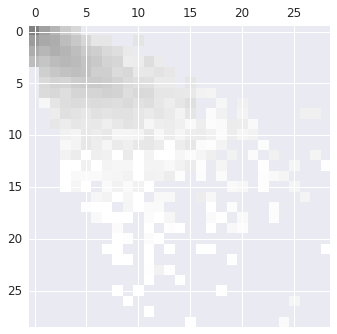

In [658]:
from matplotlib.colors import LogNorm

###--- Joint statistics ---###
crm_prec_I90_PI = getVar('CRM_PREC_I90',inputdir_PI)*86400*1000    # Convert to mm/day

## Get joint statistics on IL axes
maxQ1, maxQ2, Q1_IL, Q2_IL, prect_PI_e_IL, prect_PI_c_IL, crm_prec_I90_PI_e_IL, crm_prec_I90_PI_c_IL, prect_crm_H2Dd_PI =\
getJointStatistics(prect_PI,crm_prec_I90_PI,subset=None,n_unit_min=3)

## Show what it's like

fig = plt.figure(figsize=(6.2,5.6))
ax = fig.add_subplot(111)
im = ax.matshow(prect_crm_H2Dd_PI, cmap=plt.cm.gray_r, norm=LogNorm(vmin=1e-5, vmax=1e5))

plt.show()

# Implement scaling

## piControl run, GCM scale

Import data for PRECT, OMEGA, TS, RELHUM

In [ ]:
# indir = "/Users/bfildier/Code/python/2016/SpcamExtremes/results/day/"
# infile = "CRM-PREC-I90_day_CESM111-SPCAM20_piControl_r1i1p1_18500601-18500602.nc"
# crm_prec_I90_id = "CRM_PREC_I90"
# crm_prec_I90 = 

### Extract all variables

In [377]:
inputdirroot = '/Users/bfildier/Data/preprocessed/' 
compset_spcam = 'FSPCAMm_AMIP'
exp_PI = 'piControl'
case_spcam_PI = 'bf_%s_%s'%(compset_spcam,exp_PI)
inputdir = os.path.join(inputdirroot,case_spcam_PI,'day')
inputdir_fx = os.path.join(inputdirroot,'allExperiments/fx')

prect_id = 'PRECT'
omega_id = 'OMEGA'
ts_id = 'TS'
t_id = 'T'
ps_id = 'PS'
relhum_id = 'RELHUM'
q_id = 'Q'

# Get vertical pressure coordinate as a function of surface pressure
lev_file = 'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'
computeP = getPressureCoordinateFunction(os.path.join(inputdir_fx,lev_file))

# Import variables
prect = getVar(prect_id,inputdir)*1000*86400
omega = getVar(omega_id,inputdir)
ts = getVar(ts_id,inputdir)
t = getVar(t_id,inputdir)
ps = getVar(ps_id,inputdir)
relhum = getVar(relhum_id,inputdir)
q = getVar(q_id,inputdir)

print "Importing", prect_id, omega_id, ts_id, t_id, ps_id, relhum_id, q_id

Importing PRECT OMEGA TS T PS RELHUM Q


In [122]:
print ts.mean()

298.914


Get mean values at points corresponding to a given quantile of PRECT

In [27]:
print "Resctive shapes of", prect_id, omega_id, ts_id, t_id, ps_id, relhum_id, q_id
print prect.shape, omega.shape, ts.shape, t.shape, ps.shape, relhum.shape, q.shape

Resctive shapes of PRECT OMEGA TS T PS RELHUM Q
(9, 32, 144) (9, 30, 32, 144) (9, 32, 144) (9, 30, 32, 144) (9, 32, 144) (9, 30, 32, 144) (9, 30, 32, 144)


### Manually compute all means and mean profiles

In [378]:
print "Computing mean", prect_id, omega_id, ts_id, t_id, ps_id, relhum_id, q_id, "oer the Tropics"

prect_m = computeMean(prect)
omega_m = computeMean(omega)
ts_m = computeMean(ts)
t_m = computeMean(t)
ps_m = computeMean(ps)
p_m = computeP(ps_m)
relhum_m = computeMean(relhum)
q_m = computeMean(q)
rho_m = airDensity(t_m,p_m,q_m)
w_m = np.divide(omega_m,-g*rho_m)
z_m = zOfP_all(p_vals=p_m,rho=rho_m,z_ref=0.)


Computing mean PRECT OMEGA TS T PS RELHUM Q oer the Tropics


### Manually compute means at extreme P quantile

Computing mean PRECT OMEGA TS T PS RELHUM Q at 99.9th percentile
prect_q = 88.9411253322
ts_q = 301.612
ps_q = 100558.0


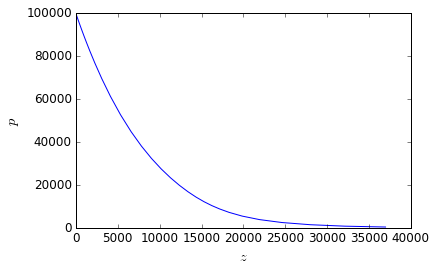

In [379]:
Q = 99.9
i_q = getIndicesOfExtremePercentile(prect,Q)

print "Computing mean", prect_id, omega_id, ts_id, t_id, ps_id, relhum_id, q_id, "at %2.1fth percentile"%Q
prect_q = computeMeanAtTimeLatLonIndices(prect,i_q)
omega_q = computeMeanAtTimeLatLonIndices(omega,i_q)
ts_q = computeMeanAtTimeLatLonIndices(ts,i_q)
t_q = computeMeanAtTimeLatLonIndices(t,i_q)
ps_q = computeMeanAtTimeLatLonIndices(ps,i_q)
p_q = computeP(ps_q)
relhum_q = computeMeanAtTimeLatLonIndices(relhum,i_q)
q_q = computeMeanAtTimeLatLonIndices(q,i_q)
rho_q = airDensity(t_q,p_q,q_q)
w_q = np.divide(omega_q,-g*rho_q)
z_q = zOfP_all(p_vals=p_q,rho=rho_q,z_ref=0.)

print "prect_q =", prect_q
print "ts_q =", ts_q
print "ps_q =", ps_q

plt.plot(z_q,p_q)
plt.xlabel(r'$z$')
plt.ylabel(r'$p$')

### Explore Jake's code for moist-adiabats

(30,) (30,) (30,) (30,)
0.0 36988.0768432 37.0251019451
p(BL) = 99809.1689027
T(BL) = 298.36
qt0 =  0.0202206676343


/Users/bfildier/Code/python/2016/SpcamExtremes/functions/thermo_funcs.py:79: RuntimeWarning: invalid value encountered in power
  return (1. - qt)*(R_d/R_v)/(p/e_0 * (T_0/T)**(dcp/R_v) * \
/Users/bfildier/Code/python/2016/SpcamExtremes/functions/thermo_funcs.py:79: RuntimeWarning: invalid value encountered in double_scalars
  return (1. - qt)*(R_d/R_v)/(p/e_0 * (T_0/T)**(dcp/R_v) * \
/Users/bfildier/Code/python/2016/SpcamExtremes/functions/thermo_funcs.py:158: RuntimeWarning: invalid value encountered in double_scalars
  (vap_pres_ratio)**(rv*R_v/c_pd)*np.exp((rv*s_0v - rs*s_0s2)/c_pd)
/Users/bfildier/Code/python/2016/SpcamExtremes/functions/thermo_funcs.py:329: RuntimeWarning: divide by zero encountered in double_scalars
  unsat = True


ValueError: array must not contain infs or NaNs

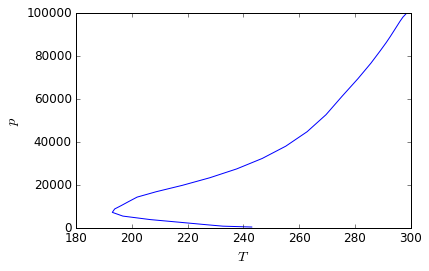

In [380]:
# Compute the parcel's moist adiabatic profiles based on surface pressure and 
pres = p_q
temp = t_q
i_BL = -1
i_top = 0

z = zOfP_all(p_vals=p_q,rho=rho_q,z_ref=0.)
print temp.shape, pres.shape, z.shape, rho_q.shape
dz = (z[i_top]-z[i_BL])/999.
print z[i_BL], z[i_top], dz
qt0 = qvstar(pres[i_BL],temp[i_BL])
print "p(BL) =", pres[i_BL]
print "T(BL) =", temp[i_BL]
print "qt0 = ", qt0

plt.plot(t_q,p_q)
plt.xlabel(r"$T$")
plt.ylabel(r"$p$")
# plt.show()

adiab_profiles = adiabatic_profile(mode='parcel',T0=temp[i_BL],qt0=qt0,z0=z[i_BL],p0=pres[i_BL],
                                   dz=dz,ztop=z[i_top],fallout_factor=1.,
                                   rho_e=rho_q,rho_z=z,icemode=1)
# adiab_profiles = adiabatic_profile(mode='env',T0=temp[i_BL],qt0=qt0,z0=z[i_BL],p0=pres[i_BL],
#                                    dz=dz,ztop=z[i_top],fallout_factor=1.,icemode=1)

# print p_q.min(), p_q.max()
# print adiab_profiles['p'].min(), adiab_profiles['p'].max()

from scipy import interpolate
## profiles is a dictionary 
## At call, provide either p_vals or z_vals
def interpAllProfiles(profiles,coord_vals,coord_name='z'):
    if coord_name in ('z','p') and coord_name in profiles.keys():
        coord_old = profiles[coord_name]
        fields = profiles.keys()
        fields.remove(coord_name)
        new_profiles = {coord_name:coord_vals}
        for field in fields:
            new_profiles[field] = interpolate.interp1d(coord_old,profiles[field],kind='cubic')(coord_vals)
    else:
        print"'coord_name' must be 'z' or 'p' and must be present in 'profiles.keys()'"
        sys.exit(-1)
    return new_profiles

        
i_trop = np.argmax(temp == temp.min())
i_BL = np.argmax(temp == temp.max())
adiab_profiles_p = interpAllProfiles(profiles=adiab_profiles,coord_vals=p_q[i_trop:i_BL+1],coord_name='p')
# adiab_profiles_z = interpAllProfiles(profiles=adiab_profiles,coord_vals=z,coord_name='z')


plt.plot(adiab_profiles_p['T'],adiab_profiles_p['p'])
ax = plt.gca()
ax.set_xlim((150, 300))
ax.invert_yaxis()
# plt.plot(adiab_profiles_z['p'],adiab_profiles_z['z'])
print p_q[i_trop]

### Get the vertical pressure coordinate and plot the above means

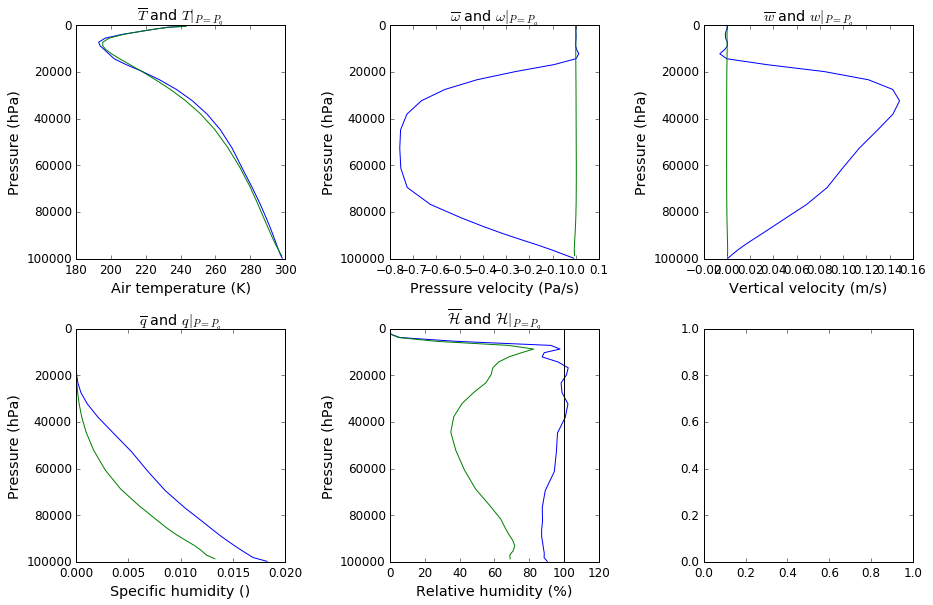

In [381]:

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(15,10))

ax1.plot(t_q,p_q)
ax1.plot(t_m,p_m)
ax1.invert_yaxis()
ax1.set_xlabel(r"Air temperature (K)")
ax1.set_ylabel("Pressure (hPa)")
ax1.set_title(r"$\overline{T}$ and $T\vert_{P=P_q}$")

ax2.plot(omega_q,p_q)
ax2.plot(omega_m,p_m)
ax2.invert_yaxis()
ax2.set_xlabel(r"Pressure velocity (Pa/s)")
ax2.set_ylabel("Pressure (hPa)")
ax2.set_title(r"$\overline{\omega}$ and $\omega\vert_{P=P_q}$")

ax3.plot(w_q,p_q)
ax3.plot(w_m,p_m)
ax3.invert_yaxis()
ax3.set_xlabel(r"Vertical velocity (m/s)")
ax3.set_ylabel("Pressure (hPa)")
ax3.set_title(r"$\overline{w}$ and $w\vert_{P=P_q}$")

ax4.plot(q_q,p_q)
ax4.plot(q_m,p_m)
ax4.invert_yaxis()
ax4.set_xlabel(r"Specific humidity ()")
ax4.set_ylabel("Pressure (hPa)")
ax4.set_title(r"$\overline{q}$ and $q\vert_{P=P_q}$")

ax5.plot(relhum_q,p_q)
ax5.plot(relhum_m,p_m)
ax5.invert_yaxis()
ax5.set_xlabel(r"Relative humidity (%)")
ax5.set_ylabel("Pressure (hPa)")
ax5.set_title(r"$\overline{\mathcal{H}}$ and $\mathcal{H}\vert_{P=P_q}$")
ax5.axvline(x=100,c='k')

plt.show()

### Combine all to implement scaling

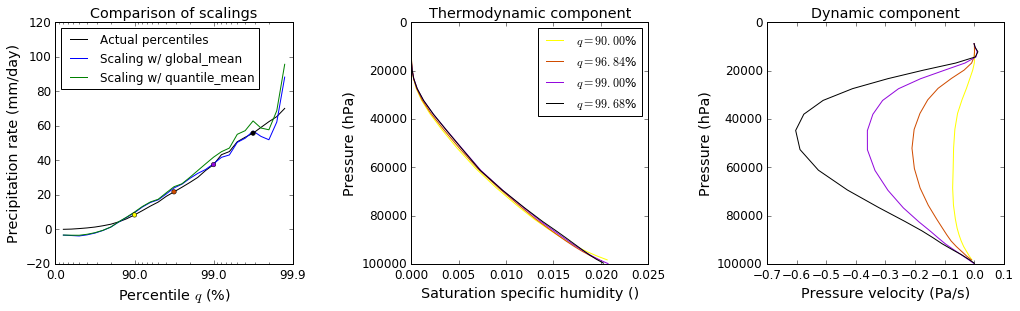

In [382]:
pr = prect
temp = t
pres_surf = ps
omega = omega
spec_hum = q

# modes = ('global_mean', 'quantile_mean', 'adiab_parcel')
modes = ('global_mean', 'quantile_mean')
mode = modes[0]

Q_max, Q_IL, pr_c_IL, pr_e_IL = defineInvLogPercentiles(pr)
i_Q90 = np.argmax(Q_IL == 90)
di = np.argmax(Q_IL == 99) - i_Q90
i_Qs = np.arange(i_Q90,len(Q_IL),di/2,dtype=int)


omega_sc = {}
qvs_sc = {}
pr_sc = {}
p_sc = {}
for mode in modes:
    pr_sc[mode] = np.zeros(len(Q_IL))
    qvs_sc[mode] = []
    omega_sc[mode] = []
    p_sc[mode] = []
    for i in range(len(Q_IL)):
        Q = Q_IL[i]
        omega_sc_q, qvs_sc_q, p_sc_q = computeProfilesForScaling(mode,Q,pr,pres_surf,temp,spec_hum,omega,computeP)
        omega_sc[mode].append(omega_sc_q)
        qvs_sc[mode].append(qvs_sc_q)
        p_sc[mode].append(p_sc_q)
        pr_sc[mode][i] = computeScaling(omega_sc_q,qvs_sc_q)
    print
        
    
## Define colors
cmap = plt.get_cmap('gnuplot_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(i_Qs))]
    
##-- PLOT --##
fig, ((ax1,ax2,ax3))  = plt.subplots(ncols=3, nrows=1, figsize=(17,4.5))
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
ax1.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim((1,3e2))
ax1.plot(x,pr_c_IL,'k',label='Actual percentiles')
for mode in modes:
    ax1.plot(x,pr_sc[mode],label='Scaling w/ %s'%mode)
x_sub = np.flipud(1./np.subtract(np.ones(i_Qs.size),Q_IL[np.flipud(-i_Qs-1)]/100.))
ax1.scatter(x_sub,pr_c_IL[i_Qs],c=colors,linewidth=0.5,zorder=4)
ax1.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')
ax1.set_xlabel(r"Percentile $q$ (%)")
ax1.set_ylabel("Precipitation rate (mm/day)")
ax1.set_title("Comparison of scalings")

for i in range(len(i_Qs)):
    ax2.plot(qvs_sc[modes[1]][i_Qs[i]],p_sc[modes[1]][i_Qs[i]],label=r"$q=%2.2f$%%"%Q_IL[i_Qs[i]],c=colors[i])
ax2.set_xlabel(r"Saturation specific humidity ()")
ax2.set_ylabel("Pressure (hPa)")

ax2.invert_yaxis()
ax2.legend(loc='upper right')
ax2.set_title("Thermodynamic component")

for i in range(len(i_Qs)):
    ax3.plot(omega_sc[modes[1]][i_Qs[i]],p_sc[modes[1]][i_Qs[i]],label=r"$q=%2.2f$%%"%Q_IL[i_Qs[i]],c=colors[i])
ax3.set_xlabel(r"Pressure velocity (Pa/s)")
ax3.set_ylabel("Pressure (hPa)")
ax3.invert_yaxis()
ax3.set_title("Dynamic component")

plt.show()

Look at the variability in surface pressure within given quantiles

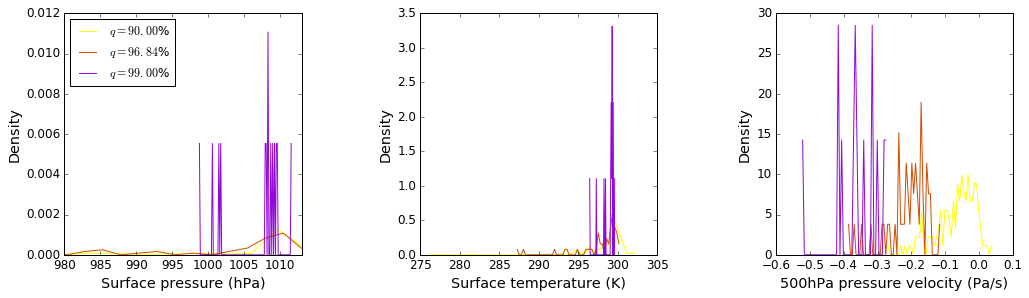

In [383]:
Q_max, Q_IL, pr_c_IL, pr_e_IL = defineInvLogPercentiles(pr)
i_Q90 = np.argmax(Q_IL == 90)
di = np.argmax(Q_IL == 99) - i_Q90
i_Qs = np.arange(i_Q90,len(Q_IL),di/2,dtype=int)

## Find vertical index of 500Hpa
dp_500_dist = np.absolute(np.subtract(pres,50000*np.ones(pres.size)))
i_p500 = np.argmax(dp_500_dist == dp_500_dist.min())

## Define colors
cmap = plt.get_cmap('gnuplot_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(i_Qs))]
    
##-- PLOT --##
fig, ((ax1,ax2,ax3))  = plt.subplots(ncols=3, nrows=1, figsize=(17,4.5))

for i in range(len(i_Qs)-1):
    Q = Q_IL[i_Qs[i]]
    i_q = getIndicesOfExtremePercentile(pr,Q)
    # Compute and plot histogram for surface pressure
    ps_Hd, ps_e = np.histogram(pres_surf[i_q],bins=100,density=True)
    ps_c = 0.5*(ps_e[1:]+ps_e[:-1])
    ax1.plot(ps_c/100.,ps_Hd,label=r"$q=%2.2f$%%"%Q_IL[i_Qs[i]],c=colors[i])
    # Compute and plot histogram for surface temperature
    ts_Hd, ts_e = np.histogram(temp[:,-1,:,:][i_q],bins=50,density=True)
    ts_c = 0.5*(ts_e[1:]+ts_e[:-1])
    ax2.plot(ts_c,ts_Hd,c=colors[i])
    # Compute and plot histogram for surface temperature
    omega500_Hd, omega500_e = np.histogram(omega[:,i_p500,:,:][i_q],bins=50,density=True)
    omega500_c = 0.5*(omega500_e[1:]+omega500_e[:-1])
    ax3.plot(omega500_c,omega500_Hd,c=colors[i])

ax1.set_xlabel("Surface pressure (hPa)")
ax1.set_ylabel("Density")
ax1.set_xlim(980,1013)
ax1.legend(loc='upper left')
ax2.set_xlabel("Surface temperature (K)")
ax2.set_ylabel("Density")
ax3.set_xlabel("500hPa pressure velocity (Pa/s)")
ax3.set_ylabel("Density")

plt.show()


# Over tropical oceans only

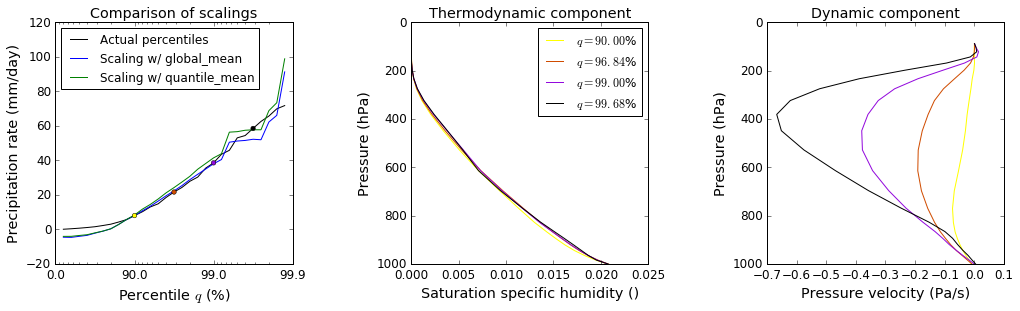

In [384]:
## Variables
pr = prect
temp = t
pres_surf = ps
omega = omega
spec_hum = q


## Compute ocean points only
landfile = 'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'
fh_landmask = Dataset(os.path.join(inputdir_fx,landfile))
landmask = fh_landmask.variables['landmask']
ocean_pts = np.logical_not(landmask)


# modes = ('global_mean', 'quantile_mean', 'adiab_parcel')
modes = ('global_mean', 'quantile_mean')
mode = modes[0]

n_unit_min = 3

## Choose percentiles
Q_max, Q_IL, pr_c_IL, pr_e_IL = defineInvLogPercentiles(pr,subset=ocean_pts,n_unit_min=n_unit_min)
i_Q90 = np.argmax(Q_IL == 90)
di = np.argmax(Q_IL == 99) - i_Q90
if di < 0:
    di = 10
i_Qs = np.arange(i_Q90,len(Q_IL),di/2,dtype=int)
# print i_Qs

omega_sc = {}
qvs_sc = {}
pr_sc = {}
p_sc = {}
for mode in modes:
    pr_sc[mode] = np.zeros(len(Q_IL))
    qvs_sc[mode] = []
    omega_sc[mode] = []
    p_sc[mode] = []
    for i in range(len(Q_IL)):
        Q = Q_IL[i]
        omega_sc_q, qvs_sc_q, p_sc_q = computeProfilesForScaling(mode,Q,pr,pres_surf,temp,spec_hum,omega,computeP,\
                                                                 subset=ocean_pts,n_unit_min=n_unit_min)
        omega_sc[mode].append(omega_sc_q)
        qvs_sc[mode].append(qvs_sc_q)
        p_sc[mode].append(p_sc_q)
        pr_sc[mode][i] = computeScaling(omega_sc_q,qvs_sc_q)
    print
        
    
## Define colors
cmap = plt.get_cmap('gnuplot_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(i_Qs))]
    
##-- PLOT --##
fig, ((ax1,ax2,ax3))  = plt.subplots(ncols=3, nrows=1, figsize=(17,4.5))
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
ax1.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim((1,3e2))
ax1.plot(x,pr_c_IL,'k',label='Actual percentiles')
for mode in modes:
    ax1.plot(x,pr_sc[mode],label='Scaling w/ %s'%mode)
x_sub = np.flipud(1./np.subtract(np.ones(i_Qs.size),Q_IL[np.flipud(-i_Qs-1)]/100.))
ax1.scatter(x_sub,pr_c_IL[i_Qs],c=colors,linewidth=0.5,zorder=4)
ax1.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')
ax1.set_xlabel(r"Percentile $q$ (%)")
ax1.set_ylabel("Precipitation rate (mm/day)")
ax1.set_title("Comparison of scalings")

for i in range(len(i_Qs)):
    ax2.plot(qvs_sc[modes[1]][i_Qs[i]],p_sc[modes[1]][i_Qs[i]]/100.,label=r"$q=%2.2f$%%"%Q_IL[i_Qs[i]],c=colors[i])
ax2.set_xlabel(r"Saturation specific humidity ()")
ax2.set_ylabel("Pressure (hPa)")
ax2.set_ylim(0,1000)
ax2.invert_yaxis()
ax2.legend(loc='upper right')
ax2.set_title("Thermodynamic component")

for i in range(len(i_Qs)):
    ax3.plot(omega_sc[modes[1]][i_Qs[i]],p_sc[modes[1]][i_Qs[i]]/100.,label=r"$q=%2.2f$%%"%Q_IL[i_Qs[i]],c=colors[i])
ax3.set_xlabel(r"Pressure velocity (Pa/s)")
ax3.set_ylabel("Pressure (hPa)")
ax3.set_ylim(0,1000)
ax3.invert_yaxis()
ax3.set_title("Dynamic component")

plt.show()

# CRM plots over GCM indices of most intense rainfall

## Compute indices of extremes for a given P variable and quantile threshold

In [ ]:
Q = 99.6838
pr_id = 